In [37]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [38]:
!pip install scikit-learn==1.3.0


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\pagad\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Loading the Iris dataset

In [39]:
df = pd.read_csv('Iris.csv')

In [40]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [41]:
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [42]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [44]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [45]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: >

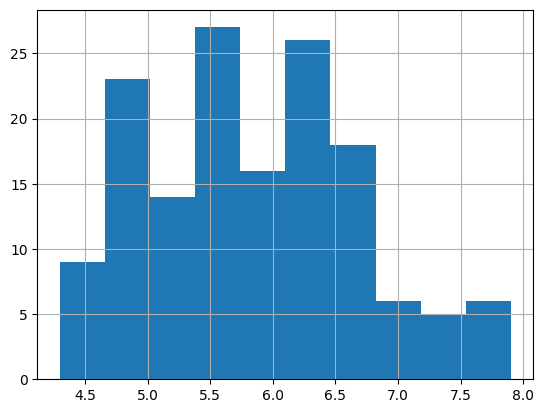

In [46]:
df['SepalLengthCm'].hist()

<Axes: >

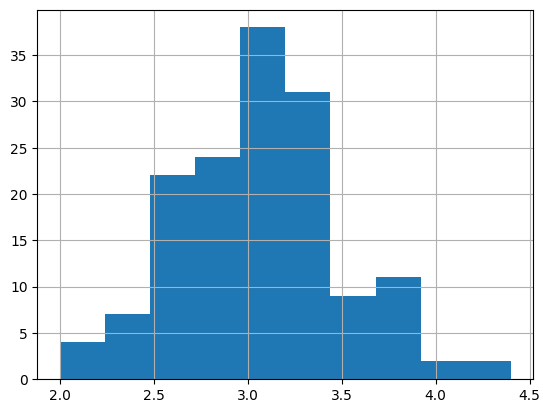

In [47]:
df['SepalWidthCm'].hist()

<Axes: >

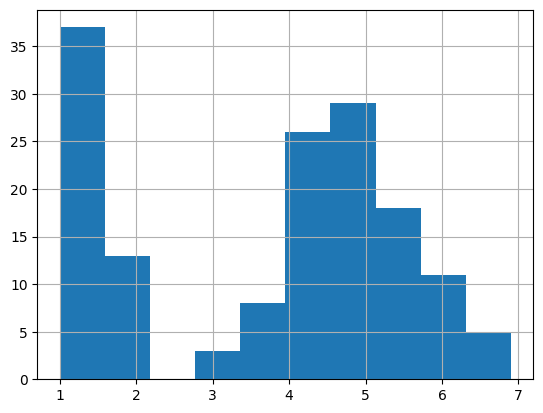

In [48]:
df['PetalLengthCm'].hist()

<Axes: >

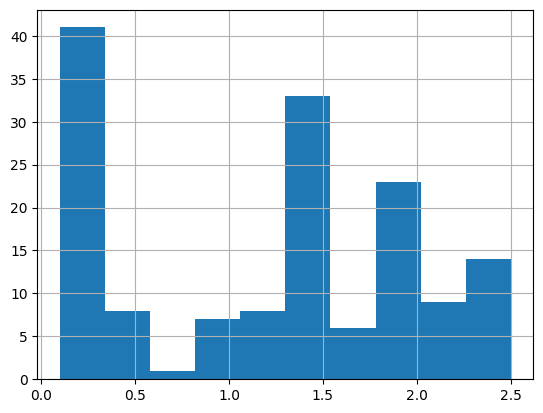

In [49]:
df['PetalWidthCm'].hist()

In [50]:
colors = ['salmon', 'blue', 'black']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

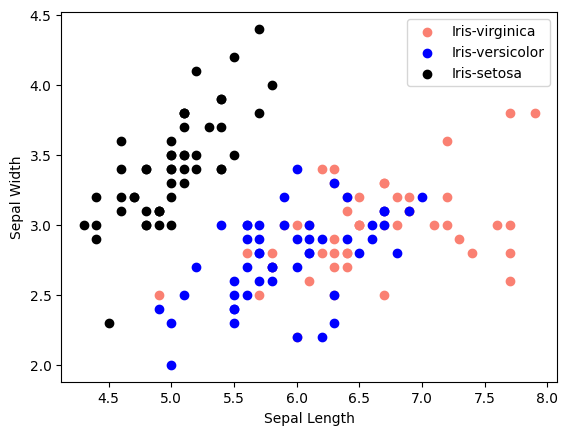

In [51]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()


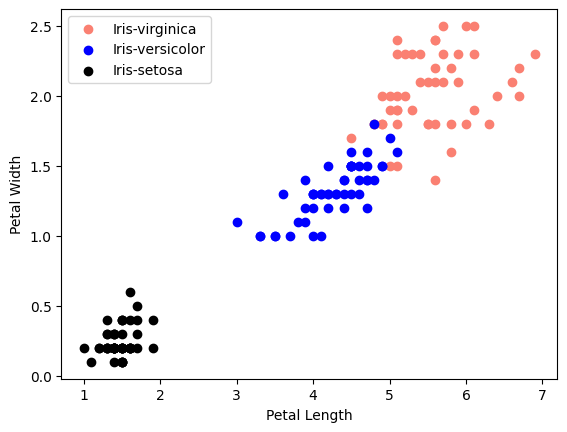

In [52]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

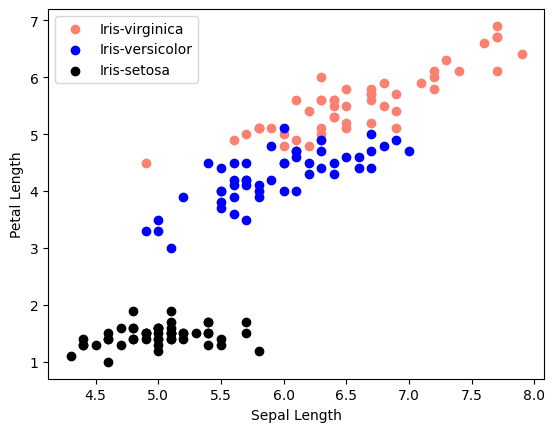

In [53]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

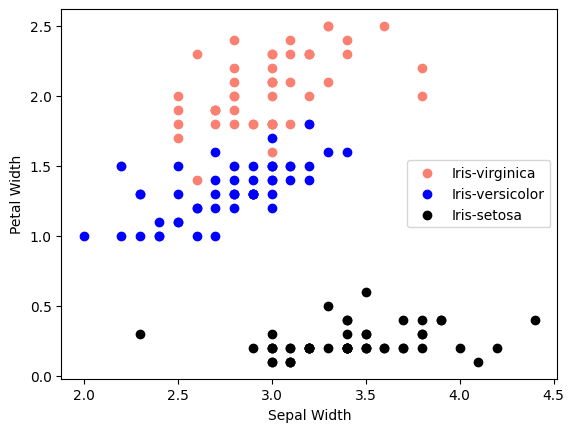

In [54]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

Correlation matrix

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is between -1 and 1.

A correlation matrix is useful for:

Identifying relationships: It helps to identify and understand the strength and direction of relationships between variables.
Feature selection: In machine learning, it can help in selecting features that are highly correlated with the target variable but not highly correlated with each other.
Data exploration: It provides a quick overview of the relationships between many variables in a dataset.

In [55]:
# Correlation matrix works only on numeric data types

# df_numeric = df.select_dtypes(include=[int, float])
# df_numeric.head()
# df_numeric.corr()
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

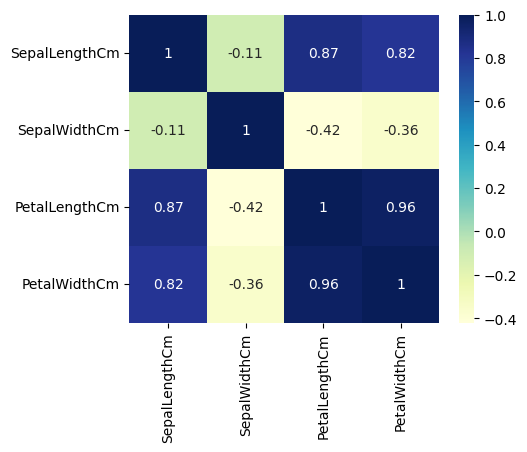

In [56]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'YlGnBu')

Label Encoder

A LabelEncoder is a utility provided by the sklearn.preprocessing module in the Scikit-learn library. It is used to convert categorical labels (text or string) into numeric form, which can be more easily used in machine learning models. The primary purpose of LabelEncoder is to transform categorical labels into integers.

In [57]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df['Species'] = le.fit_transform(df['Species'])
# df.head()

Model Training and Testing

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [59]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(x_train.values, y_train.values)
print("Logistic Regression Accuracy: ", lr_model.score(x_test, y_test) * 100)

Logistic Regression Accuracy:  91.11111111111111


In [60]:
# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(x_train.values, y_train.values)
print("K-Nearest Neighbors Accuracy: ", knn_model.score(x_test, y_test) * 100)

K-Nearest Neighbors Accuracy:  93.33333333333333


In [61]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train.values, y_train.values)
print("Decision Tree Accuracy: ", dt_model.score(x_test, y_test) * 100)

Decision Tree Accuracy:  93.33333333333333


Pickle

Pickle is a python module used for serializing and deserializing Python objects. Serialization (or "pickling") is the process of converting a Python object into a byte stream, which can be stored in a file or transmitted over a network. Deserialization (or "unpickling") is the process of converting a byte stream back into a Python object.

In [62]:
import pickle

In [63]:
filename = 'final_iris_model.pkl'
try:
    with open(filename, 'wb') as file:
        pickle.dump(dt_model, file)
    print("Model saved successfully")
except Exception as e:
    print(f"Error saving the model: {e}")

Model saved successfully


In [64]:
load_model = pickle.load(open(filename, 'rb'))

In [65]:
x_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
114,5.8,2.8,5.1,2.4
47,4.6,3.2,1.4,0.2
124,6.7,3.3,5.7,2.1
144,6.7,3.3,5.7,2.5
109,7.2,3.6,6.1,2.5


In [70]:
load_model.predict([[5.1, 2.5, 3.4, 0.2]])

array(['Iris-versicolor'], dtype=object)

In [71]:
load_model.predict([[4.2, 3.6, 1.1, 1.2]])

array(['Iris-setosa'], dtype=object)